In [8]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "./data"
categories = ["그레이하운드", "말티즈", "불독", "비글","셰퍼드","시바견","시츄","요크셔테리어","웰시코기","치와와","포메라니안","푸들","허스키"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3


X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes
#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./numpy_data/multi_image_data.npy", xy)

print("ok", len(y))

그레이하운드  파일 길이 :  698
그레이하운드  :  ./data/그레이하운드\action-2962594__340.jpg
말티즈  파일 길이 :  680
말티즈  :  ./data/말티즈\animal-2881905__340.jpg
불독  파일 길이 :  1166
불독  :  ./data/불독\adorable-1853438__340.jpg
불독  :  ./data/불독\french-bulldog-5087397__340.jpg
비글  파일 길이 :  530
비글  :  ./data/비글\adorable-4650399__340.jpg
셰퍼드  파일 길이 :  2175
셰퍼드  :  ./data/셰퍼드\a-protestant-pastor-4572875__340.jpg
셰퍼드  :  ./data/셰퍼드\dog-398556__340.jpg
셰퍼드  :  ./data/셰퍼드\goats-2943146__340.jpg
셰퍼드  :  ./data/셰퍼드\셰퍼드_415.jpg
시바견  파일 길이 :  310
시바견  :  ./data/시바견\animal-2866654__340.jpg
시츄  파일 길이 :  250
시츄  :  ./data/시츄\pet-3521679__340.jpg
요크셔테리어  파일 길이 :  634
요크셔테리어  :  ./data/요크셔테리어\animal-1283027__340.jpg
웰시코기  파일 길이 :  367
웰시코기  :  ./data/웰시코기\active-5078229__340.jpg
치와와  파일 길이 :  503
치와와  :  ./data/치와와\and-1594161__340.jpg
포메라니안  파일 길이 :  421
포메라니안  :  ./data/포메라니안\cute-3252210__340.jpg
푸들  파일 길이 :  550
푸들  :  ./data/푸들\dog-1406295__340.jpg
허스키  파일 길이 :  858
허스키  :  ./data/허스키\alaskan-husky-1460928__340.jpg
허스키  :  ./data/허

In [9]:
import numpy as np
np.load.__defaults__=(None, True, True, 'ASCII')
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

import tensorflow as tf

X_train, X_test, y_train, y_test = np.load('./numpy_data/multi_image_data.npy')

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification2.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [ ]:
from keras.models import load_model
model = load_model('./model/multi_img_classification.model')
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Epoch 1/50
215/215 [==============================] - 26s 117ms/step - loss: 2.0275 - accuracy: 0.3426 - val_loss: 1.9133 - val_accuracy: 0.3753

Epoch 00001: val_loss did not improve from 1.90937
Epoch 2/50
215/215 [==============================] - 24s 111ms/step - loss: 1.8977 - accuracy: 0.3791 - val_loss: 1.8662 - val_accuracy: 0.3793

Epoch 00002: val_loss improved from 1.90937 to 1.86619, saving model to ./model\multi_img_classification2.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification2.model\assets
Epoch 3/50
215/215 [==============================] - 24s 111ms/step - loss: 1.8005 - accuracy: 0.4110 - val_loss: 1.8176 - val_accuracy: 0.4003

Epoch 00003: val_loss improved from 1.86619 to 1.81762, saving model to ./model\multi_img_classification2.model
INFO:tensorflow:Assets written to: ./model\multi_img_classification2.model\assets
Epoch 4/50
215/215 [==============================] - 24s 111ms/step - loss: 1.6970 - accuracy: 0.4360 - val_loss: 1.8683 -

In [11]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

72/72 [==============================] - 2s 23ms/step - loss: 1.9660 - accuracy: 0.4038
정확도 : 0.4038


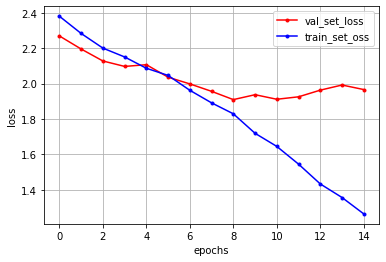

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()